In [1]:
import torch
import matplotlib.pyplot as plt
import math

In [120]:
pharm = torch.tensor([[-7.952946, 50.835064, 15.405832], 
[-11.139765, 47.25328, 8.895022], 
[-10.963514, 52.138943, 11.677305], 
[-9.835253, 45.382126, 5.5265536],
[-10.640934, 49.345978, 10.610521], 
[-9.694391, 52.508236, 13.588981]])

def make_gaussian_noise(pos, R=1):
    std = math.sqrt(R**2 / 27)

    size = pos.shape
    random_noise = torch.normal(
        mean=0, std=std, size=size)
    return random_noise

def make_spherical_noise(pos, R=1):
    size, _ = pos.shape
    device = pos.device

    # Generate all random values in one call
    rand_vals = torch.rand((size, 3), device=device)

    phi = rand_vals[:, 0] * 6.28
    costheta = rand_vals[:, 1] * 2 - 1
    u = rand_vals[:, 2]

    theta = torch.arccos(costheta)

    # Calculate sin and cos once to avoid redundant computations
    sin_theta = torch.sin(theta)
    cos_theta = torch.cos(theta)

    r = R * torch.pow(u, 1/3)
    x = r * sin_theta * torch.cos(phi)
    y = r * sin_theta * torch.sin(phi)
    z = r * cos_theta

    return torch.vstack((x, y, z)).T

def make_sphere_surface_noise(pos):
    size, _ = pos.shape
    device = pos.device
    r = 1

    # Generate all random values in one call
    rand_vals = torch.rand((size, 3), device=device)

    phi = rand_vals[:, 0] * 6.28
    costheta = rand_vals[:, 1] * 2 - 1
    theta = torch.arccos(costheta)

    # Calculate sin and cos once to avoid redundant computations
    sin_theta = torch.sin(theta)
    cos_theta = torch.cos(theta)

    #r = R * torch.pow(u, 1/3)
    x = r * sin_theta * torch.cos(phi)
    y = r * sin_theta * torch.sin(phi)
    z = r * cos_theta

    return torch.vstack((x, y, z)).T


torch.norm(make_spherical_noise(pharm), dim=1)

tensor([0.9057, 0.6364, 0.8248, 0.7226, 0.5789, 0.8821])

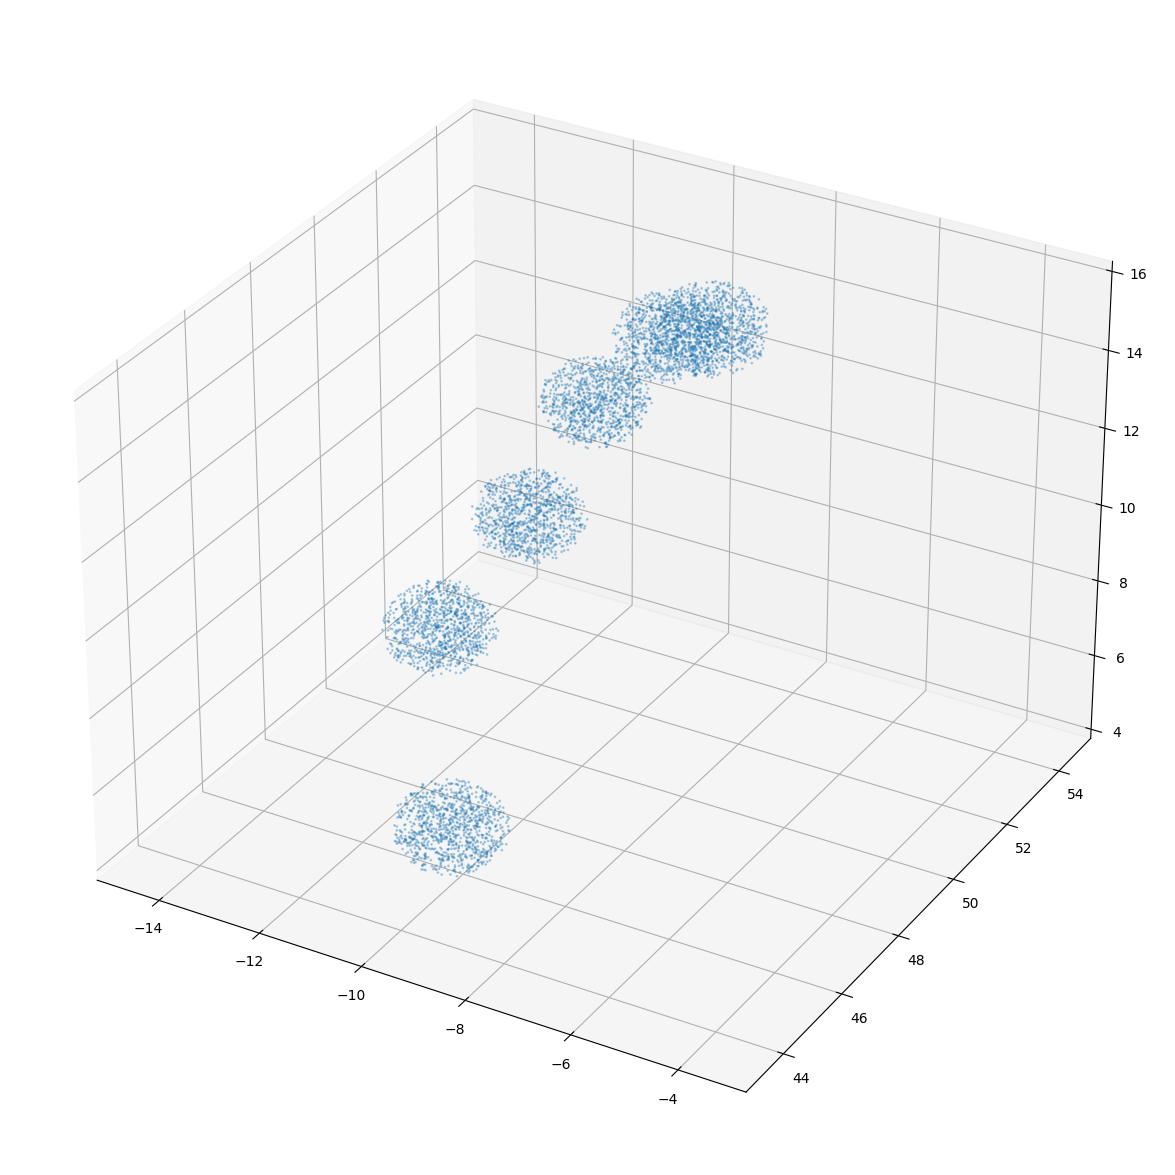

<function matplotlib.pyplot.show(close=None, block=None)>

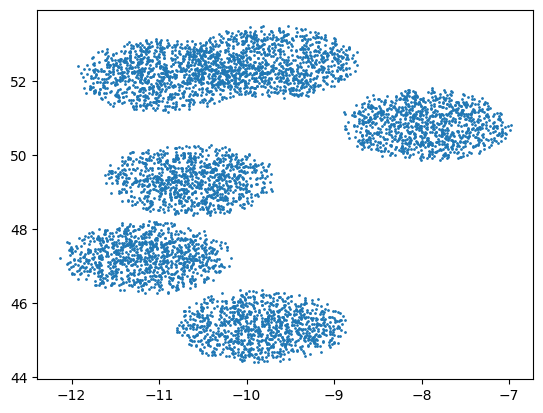

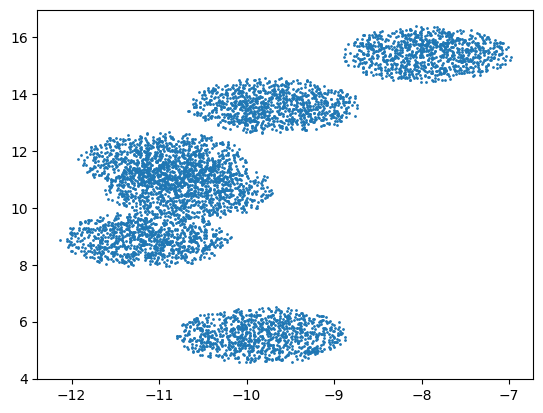

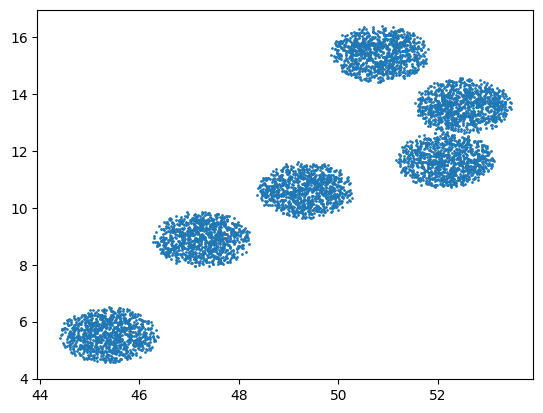

In [123]:
pharm = torch.tensor([[-7.952946, 50.835064, 15.405832], 
[-11.139765, 47.25328, 8.895022], 
[-10.963514, 52.138943, 11.677305], 
[-9.835253, 45.382126, 5.5265536],
[-10.640934, 49.345978, 10.610521], 
[-9.694391, 52.508236, 13.588981]])

samples = 1000

pharm = torch.cat([pharm for i in range(samples)])
pharm += make_spherical_noise(pharm)
pharm = pharm.numpy()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim(-15, -3)
ax.set_ylim(43, 55)
ax.set_zlim(4, 16)
ax.scatter(pharm[:, 0], pharm[:, 1], pharm[:, 2], s=1, alpha=0.3)
plt.show()

fig = plt.figure()
plt.scatter(pharm[:, 0], pharm[:, 1], s=1)
plt.show

fig = plt.figure()
plt.scatter(pharm[:, 0], pharm[:, 2], s=1)
plt.show

fig = plt.figure()
plt.scatter(pharm[:, 1], pharm[:, 2], s=1)
plt.show